In [1]:
from scipy.signal import fftconvolve, convolve2d
from astropy.io import fits
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
%matplotlib inline

In [24]:
#simulation = "/scratch/datasets/kat7_2000/"
#neural_output = "/home/gijs/Work/vacuum-cleaner/test/rewrite/fits/"

simulation = "/scratch/datasets/meerkat16_deep2like/"
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like/fits/"   #  2.834
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_sphe_noscale/fits/"   # 2.7635
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_allblack/fits/"  # 2.8523
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_morerange/fits/"  # 3.99

simulation = "/scratch/datasets/meerkat16_deep2like_morerange/"
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_morerange_withscale/fits/" # 3.135590717989963
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_map/fits/"  # 2.48
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_madandgan/fits/"  #  2.44
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_mad_scale_l1_100/fits/"  # 30000: 2.48 50000: 2.52
neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_madandgan_nopsf/fits/"  # 2.77

In [3]:
def render(a, imgdata, title):
    i = a.pcolor(imgdata, cmap='cubehelix')
    f.colorbar(i, ax=a)
    a.set_title(title)
    
def open_fits(x):
    return fits.open(x)[0].data.squeeze()

In [4]:
std_wsclean = []
std_neural = []

l1_wsclean = []
l1_neural = []

mad_neural = []
mad_wsclean = []

start = 1800
end = 1900

for number in range(start, end):
    target_path = "{}{}-skymodel.fits".format(simulation, number)
    neural_model_path = "{}{}-outputs.fits".format(neural_output, number)
    wsclean_model_path = "{}{}-wsclean-model.fits".format(simulation, number)
    
    neural_residual_path = "{}{}-residuals.fits".format(neural_output, number)
    wsclean_residual_path = "{}{}-wsclean-residual.fits".format(simulation, number)
    
    dirty_path = "{}{}-wsclean-dirty.fits".format(simulation, number)
    
    residual_wsclean = open_fits(wsclean_residual_path)
    residual_neural = open_fits(neural_residual_path)
    
    target = open_fits(target_path)
    dirty = open_fits(dirty_path)
    neural_model = open_fits(neural_model_path)
    wsclean_model = open_fits(wsclean_model_path)
    
    l1_neural.append(np.sum(np.abs( neural_model - target)))
    l1_wsclean.append(np.sum(np.abs( wsclean_model - target)))
    
    std_wsclean.append(np.std(residual_wsclean))
    std_neural.append(np.std(residual_neural))
    
    mad_neural.append(np.mean(np.abs(residual_neural - np.mean(residual_neural))))
    mad_wsclean.append(np.mean(np.abs(residual_wsclean - np.mean(residual_wsclean))))

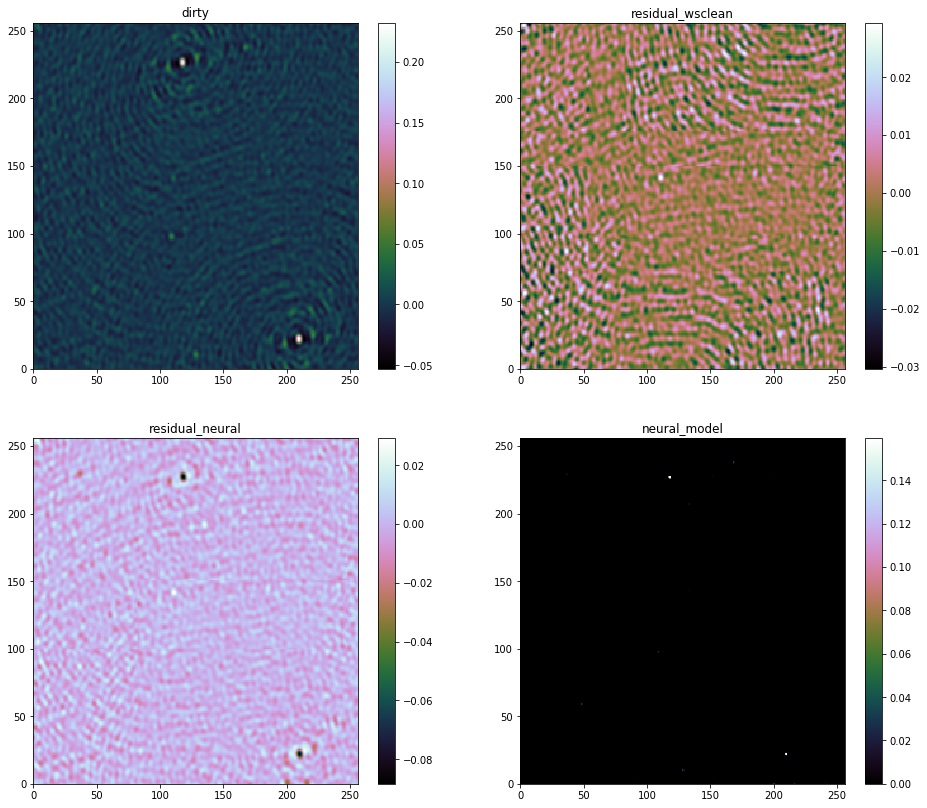

In [5]:
number = 1861
target_path = "{}{}-skymodel.fits".format(simulation, number)
neural_model_path = "{}{}-outputs.fits".format(neural_output, number)
wsclean_model_path = "{}{}-wsclean-model.fits".format(simulation, number)
neural_residual_path = "{}{}-residuals.fits".format(neural_output, number)
wsclean_residual_path = "{}{}-wsclean-residual.fits".format(simulation, number)
dirty_path = "{}{}-wsclean-dirty.fits".format(simulation, number)

residual_wsclean = open_fits(wsclean_residual_path)
residual_neural = open_fits(neural_residual_path)
target = open_fits(target_path)
dirty = open_fits(dirty_path)
neural_model = open_fits(neural_model_path)
wsclean_model = open_fits(wsclean_model_path)

f, ((a1, a2), (a3, a4)) = plt.subplots(2, 2, figsize=(16,14))
render(a1, dirty, 'dirty')
render(a2, residual_wsclean, 'residual_wsclean')
render(a3, residual_neural, 'residual_neural')
render(a4, neural_model, 'neural_model')

In [6]:
neural_model_path

'/scratch/vacuum-cleaner/test/meerkat16_deep2like_madandgan_nopsf/fits/1861-outputs.fits'

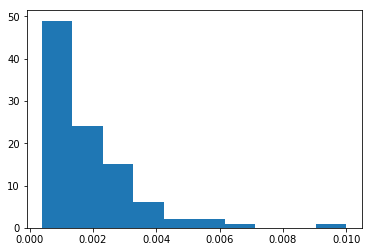

In [8]:
_ = plt.hist(mad_neural)

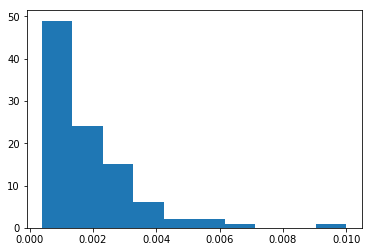

In [9]:
_ = plt.hist(mad_neural)

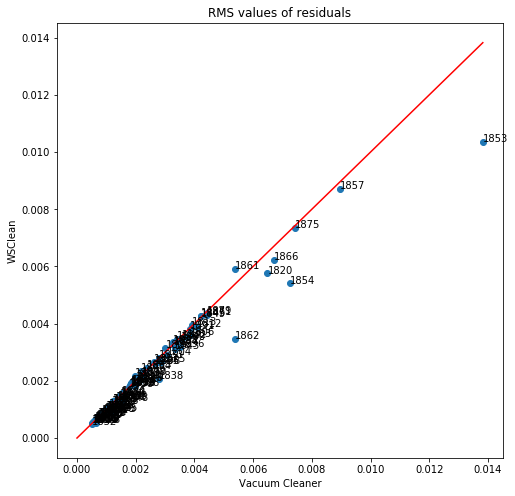

In [10]:
m = max(std_wsclean + std_neural)
f, (a1) = plt.subplots(1, 1, figsize=(8,8))
a1.plot(std_neural, std_wsclean, 'o')
a1.plot([0, m], [0, m], 'r-')
a1.set_xlabel('Vacuum Cleaner')
a1.set_ylabel('WSClean')
a1.set_title('RMS values of residuals')

#a1.set_aspect('equal')

for i, txt in enumerate(range(start, end)):
    a1.annotate(txt, (std_neural[i], std_wsclean[i]))

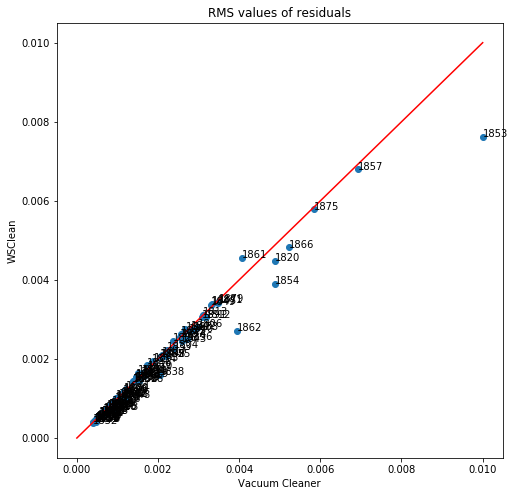

In [14]:
m = max(mad_wsclean + mad_neural)
f, (a1) = plt.subplots(1, 1, figsize=(8,8))
a1.plot(mad_neural, mad_wsclean, 'o')
a1.plot([0, m], [0, m], 'r-')
a1.set_xlabel('Vacuum Cleaner')
a1.set_ylabel('WSClean')
a1.set_title('RMS values of residuals')

for i, txt in enumerate(range(start, end)):
    a1.annotate(txt, (mad_neural[i], mad_wsclean[i]))

Text(0.5,1,'L1 skymodel')

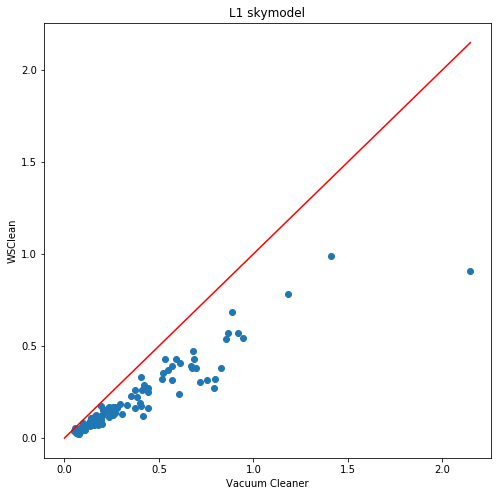

In [15]:
m = max(l1_wsclean + l1_neural)
f, (a1) = plt.subplots(1, 1, figsize=(8,8))
a1.plot(l1_neural, l1_wsclean, 'o')
a1.plot([0, m], [0, m], 'r-')
a1.set_xlabel('Vacuum Cleaner')
a1.set_ylabel('WSClean')
a1.set_title('L1 skymodel')

#a1.set_aspect('equal')

#for i, txt in enumerate(range(start, end)):
#    a1.annotate(txt, (chi2_wsclean[i], chi2_neural[i]))

In [17]:
sum(l1_neural), np.average(l1_neural), np.mean(l1_neural)

(37.06786056980491, 0.3706786, 0.3706786)

In [18]:
l1_scaling = 1/ np.average(l1_wsclean)
std_scaling = 1/ np.average(std_wsclean)

In [21]:
np.average(l1_wsclean) * l1_scaling + np.average(std_wsclean) * std_scaling   # should be 2.0

2.0

In [23]:
# this is our weighted scoring function, higher is worse, 2.0 is wsclean
np.average(l1_neural) * l1_scaling + np.average(std_neural) * std_scaling

2.77217565378794